In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

'''Importar las librerias para realizar la matriz de confusión.'''
import seaborn as sb
from sklearn.metrics import confusion_matrix

In [2]:
DATADIR = '/content/drive/MyDrive/SMOKE/'
CATEGORIES = ['train_fire', 'train_smoke']
IMG_SIZE=100

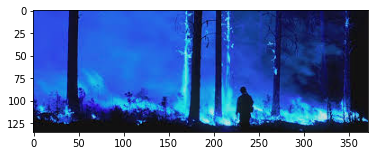

In [3]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [4]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data() 

In [5]:
print(len(training_data))

3804


In [6]:
lenofimage = len(training_data)

In [7]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [8]:
X.shape

(3804, 30000)

In [9]:
X = X/255.0

In [10]:
X[1]

array([0.00392157, 0.06666667, 0.21176471, ..., 0.        , 0.01176471,
       0.03137255])

In [11]:
y=np.array(y)

In [12]:
y.shape

(3804,)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=109)

In [14]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [15]:
y2 = svc.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
print("Accuracy is",accuracy_score(y_test,y2))

Accuracy is 0.9947437582128777


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       223
           1       1.00      0.99      1.00       538

    accuracy                           0.99       761
   macro avg       0.99      1.00      0.99       761
weighted avg       0.99      0.99      0.99       761



In [18]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})
result

,original,predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
756,1,1
757,1,1
758,1,1
759,0,0


In [19]:
'''Mediante la libreria de sklearn, 
creamos la matriz de confusion con 
los datos de 'y_test' y 'y_pred'''
cm = confusion_matrix(y_test, y2)

In [20]:
'''Insertar los nombres de y para la matriz de confusion'''
cm_df = pd.DataFrame(cm,
                     index = ['Fire', 'Smoke'], 
                     columns = ['Fire', 'Smoke'])

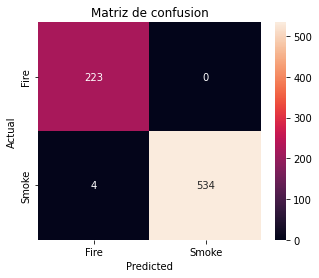

In [21]:
'''Mostrar la matriz creada, 
esto con ayuda de la libreria 
seaborn para realizar un heatmap 
de los datos...'''
plt.figure(figsize=(5,4))
sb.heatmap(cm_df, annot=True, fmt='g')
plt.title('Matriz de confusion')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()